<a href="https://colab.research.google.com/github/silro/bigvlaue/blob/master/Mnist_layers1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import tensorflow as tf
tf.__version__
import keras
keras.__version__
import numpy as np

# Input Layer

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [86]:
image = train_x[0]

In [87]:
image.shape

(28, 28)

이미지를 열어보앗다면 shape 확인
차원 수를 확인했는데 어떤 결과가 나오는가?
[batch_size, height, width, channel]

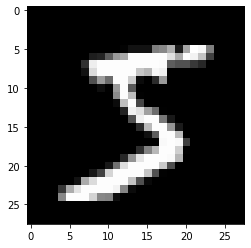

In [7]:
plt.imshow(image, 'gray')

In [88]:
image = image[tf.newaxis,..., tf.newaxis]
image.shape

(1, 28, 28, 1)

#Feature Extraction
특징 추출\n
pooling, convolution


In [96]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='SAME', activation='relu')

conv layer를 거쳐서 image에 추가한 채널에...? 어쩌고 저쩌고 ㅠㅠ 아직 이해못함 

*   필터를 거쳐서 이미지 특징을 강조함
filters : layer에서 나갈때 몇개의 필터를 만들것인가 (weights, filters, channel)
kernel_size : filter(Weight) 사이즈
strides : 몇개의 pixel을 skip하면서 훑어 지나갈것인가? (사이즈에 영향을줌)
padding : zero padding을 만들것인가? valid는 padding이 없고, same은 padding이 있음 (사이즈에 영향을 줌)
activation : 활성함수, 




In [95]:
tf.keras.layers.Conv2D(3,3,1,'SAME')

#Visualiztion



In [89]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [100]:
layer = tf.keras.layers.Conv2D(5,3,1,'SAME')
layer

In [101]:
output = layer(image)

In [102]:
output

<tf.Tensor: shape=(1, 28, 28, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0

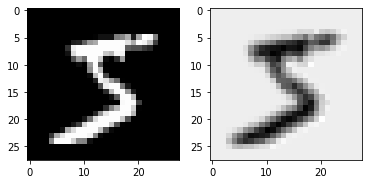

In [103]:
plt.subplot(1,2,1)
plt.imshow(image[0,:,:,0],'gray')
plt.subplot(1,2,2)
plt.imshow(output[0,:,:,0],'gray')
plt.show()

#2020.06.19 layer2
Weight

In [104]:
weight = layer.get_weights()

In [105]:
weight

[array([[[[ 0.07446313, -0.17686073,  0.07113147, -0.21304417,
           -0.09117231]],
 
         [[-0.14705825, -0.12965433, -0.32366794, -0.22074279,
            0.06528306]],
 
         [[-0.06810465,  0.01127967, -0.28170332, -0.23341179,
            0.19601431]]],
 
 
        [[[-0.1844047 , -0.27241048,  0.26942858, -0.23597106,
            0.22964558]],
 
         [[-0.0096654 , -0.04220995,  0.26641062,  0.25619236,
            0.20716956]],
 
         [[-0.25307125, -0.13056636,  0.15547886, -0.28071818,
            0.03526387]]],
 
 
        [[[ 0.03490981,  0.13885632,  0.0267643 ,  0.20179763,
           -0.1621763 ]],
 
         [[-0.12578194, -0.16549318,  0.31851116,  0.20261684,
           -0.26394448]],
 
         [[-0.02225909, -0.21555662,  0.06576839,  0.12141171,
           -0.08793387]]]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [106]:
weight[0].shape, weight[1].shape

((3, 3, 1, 5), (5,))

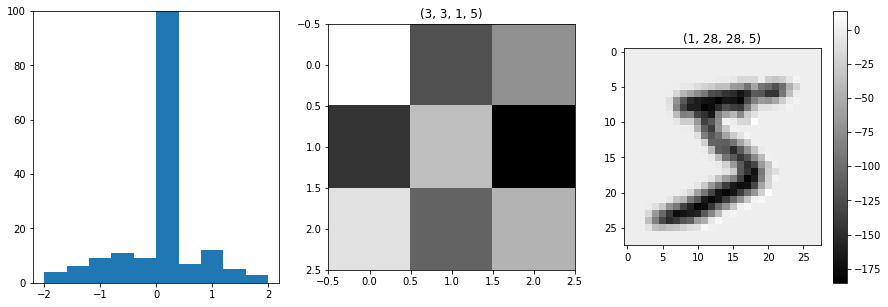

In [107]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0],'gray')

plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

# 활성함수


In [108]:
tf.keras.layers.ReLU()

In [109]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [110]:
output.shape

TensorShape([1, 28, 28, 5])

In [111]:
np.min(act_output), np.max(act_output)

(0.0, 269.28125)

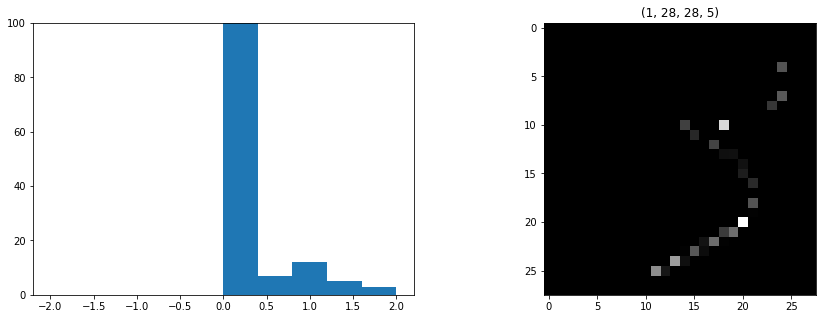

In [112]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,0],'gray')
plt.show()

#Pooling
강조되는 이미지로 줄임

In [115]:
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')

In [117]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')
pool_output = pool_layer(act_output)

In [118]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [120]:
pool_output.shape

TensorShape([1, 14, 14, 5])

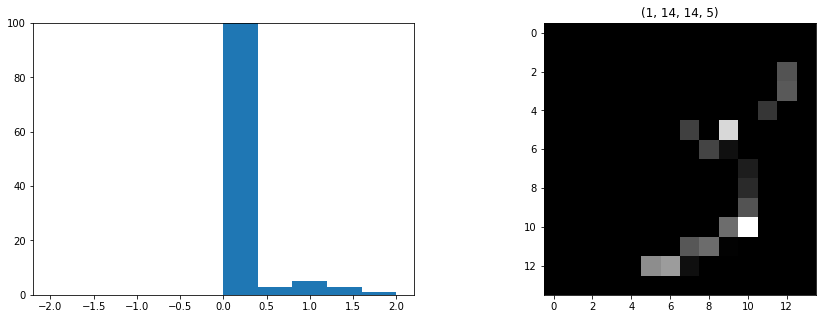

In [123]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0,:,:,0], 'gray')
plt.show()

#Flatten


In [124]:
tf.keras.layers.Flatten()

In [125]:
layer = tf.keras.layers.Flatten()

In [126]:
flatten = layer(output)

In [127]:
output.shape

TensorShape([1, 28, 28, 5])

In [129]:
flatten.shape

TensorShape([1, 3920])

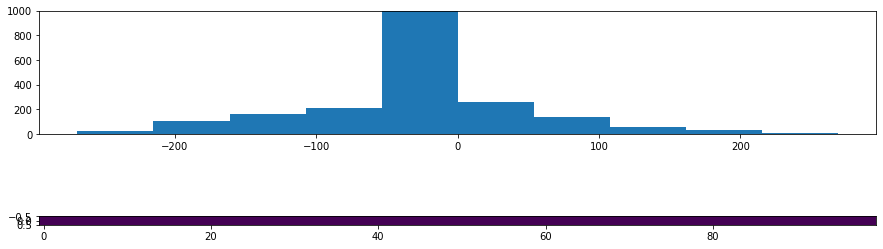

In [135]:
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.ylim(0,1000)

plt.subplot(212)
plt.imshow(flatten[:,:100])
plt.show()

#Dense

In [136]:
tf.keras.layers.Dense(32, activation='relu')

In [137]:
layer = tf.keras.layers.Dense(32, activation='relu')


In [139]:
output = layer(flatten)

In [140]:
output.shape

TensorShape([1, 32])

In [143]:
layer_2 = tf.keras.layers.Dense(10, activation='relu')
output_tmp = layer_2(output)

In [144]:
output_tmp.shape

TensorShape([1, 10])

In [145]:
#dropout

#dropout